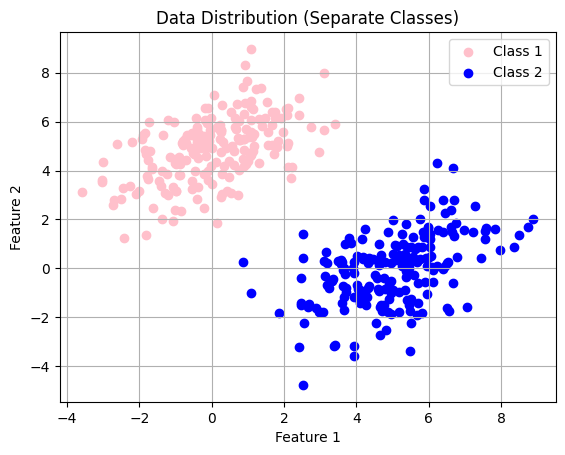

In [ ]:
#1
import matplotlib.pyplot as plt
import numpy as np

# Define data parameters
NumDataPerClass = 200
mean1 = np.array([0, 5])
mean2 = np.array([5, 0])
cov = np.array([[2, 1], [1, 2]])

# Generate data using Cholesky decomposition
chol = np.linalg.cholesky(cov)
X1 = np.random.randn(NumDataPerClass, 2) @ chol.T + mean1
X2 = np.random.randn(NumDataPerClass, 2) @ chol.T + mean2

# Plot data for class 1 (blue)
plt.scatter(X1[:, 0], X1[:, 1], label="Class 1", c='pink')

# Plot data for class 2 (red)
plt.scatter(X2[:, 0], X2[:, 1], label="Class 2", c='blue')

# Add labels and title
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Data Distribution (Separate Classes)")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
print(len(X1))

200


In [ ]:
print(len(X2))

200


In [ ]:
X = np.concatenate((X1, X2), axis=0)

In [ ]:

labelPos = np.ones(NumDataPerClass)
labelNeg = -1.0 * np.ones(NumDataPerClass)
y = np.concatenate((labelPos, labelNeg))

In [ ]:

rIndex = np.random.permutation(2*NumDataPerClass)
Xr = X[rIndex,]
yr = y[rIndex]
# Training and test sets (half half)
#
X_train = Xr[0:NumDataPerClass]
y_train = yr[0:NumDataPerClass]
X_test = Xr[NumDataPerClass:2*NumDataPerClass]
y_test = yr[NumDataPerClass:2*NumDataPerClass]
print("X train Shape is",X_train.shape)
print("Y train Shape is", y_train.shape)
print("X test Shape is",X_test.shape)
print("Y test Shape is" ,y_test.shape)
Ntrain = NumDataPerClass;
Ntest = NumDataPerClass;

X train Shape is (200, 2)
Y train Shape is (200,)
X test Shape is (200, 2)
Y test Shape is (200,)


In [ ]:
def PercentCorrect(Inputs, targets, weights):
  N = len(targets)
  nCorrect = 0
  for n in range(N):
    OneInput = Inputs[n,:]
    if (targets[n] * np.dot(OneInput, weights) > 0):
      nCorrect +=1
  return 100*nCorrect/N

In [ ]:
# Perceptron learning loop
#
# Random initialization of weights
#
w = np.random.randn(2)
print(w)
# What is the performance with the initial random weights?
#
print('Initial Percentage Correct: %6.2f' %(PercentCorrect(X_train, y_train, w)))
# Fixed number of iterations (think of better stopping criterion)
#
MaxIter=1000
# Learning rate (change this to see convergence changing)
#
alpha = 0.002
# Space to save answers for plotting
#
P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)
# Main Loop
#
for iter in range(MaxIter):
# Select a data item at random
#
  r = np.floor(np.random.rand()*Ntrain).astype(int)
  x = X_train[r,:]
  # If it is misclassified, update weights
  #
  if (y_train[r] * np.dot(x, w) < 0):
    w += alpha * y_train[r] * x
  # Evaluate trainign and test performances for plotting
  #
  P_train[iter] = PercentCorrect(X_train, y_train, w);
  P_test[iter] = PercentCorrect(X_test, y_test, w);
print('Percentage Correct After Training: %6.2f %6.2f'
%(PercentCorrect(X_train, y_train, w), PercentCorrect(X_test, y_test, w)))

[ 0.50648906 -0.69354644]
Initial Percentage Correct:   1.00
Percentage Correct After Training: 100.00 100.00


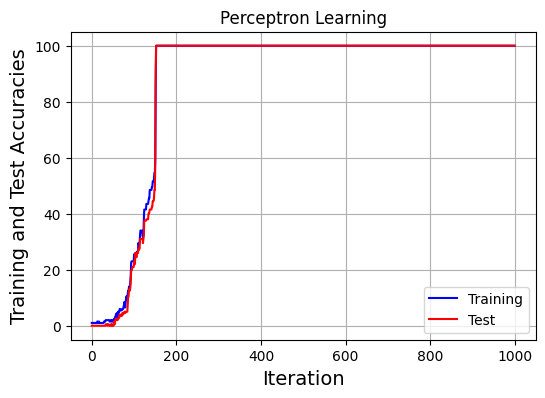

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(MaxIter), P_train, 'b', label = "Training")
ax.plot(range(MaxIter), P_test, 'r', label = "Test")
ax.grid(True)
ax.legend()
ax.set_title('Perceptron Learning')
ax.set_ylabel('Training and Test Accuracies', fontsize=14)
ax.set_xlabel('Iteration', fontsize=14)
plt.savefig('learningCurves.png')

In [ ]:
# Scikitlearn can do it for us
#
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
model = Perceptron()
model.fit(X_train, y_train)
yh_train = model.predict(X_train)
print("Accuracy on training set: %6.2f" %(accuracy_score(yh_train, y_train)))
yh_test = model.predict(X_test)
print("Accuracy on test set: %6.2f" %(accuracy_score(yh_test, y_test)))
if (accuracy_score(yh_test, y_test) > 0.99):
  print("Wow, Perfect Classification on Separable dataset!")

Accuracy on training set:   1.00
Accuracy on test set:   1.00
Wow, Perfect Classification on Separable dataset!


In [ ]:
import csv
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Load dataset from CSV
dataset_file = "/content/drive/MyDrive/NPHA-doctor-visits.csv"
file_dataset = open(dataset_file, mode='r')
csvreader_dataset = csv.reader(file_dataset)
next(csvreader_dataset)  # Skip headers

# Initialize lists to store training and test data
training_data = []
testing_data = []

In [ ]:
for i, row in enumerate(csvreader_dataset):
    if i < 300:
        training_data.append(row)
    else:
        testing_data.append(row)

training_data = np.array(training_data)
testing_data = np.array(testing_data)

# Separate features and labels for training data
X_train = training_data[:, 0:-1].astype(float)
y_train = training_data[:, -1]
rIndex = np.random.permutation(len(training_data))
X_train = X_train[rIndex]
y_train = y_train[rIndex]
y_train = np.where(y_train=="2", 1, -1)

# Separate features and labels for test data
X_test = testing_data[:, 0:-1].astype(float)
y_test = testing_data[:, -1]
y_test = np.where(y_test=="2", 1, -1)

# Display shapes of datasets
print("Shape of training data (X_train):", X_train.shape)
print("Shape of training labels (y_train):", y_train.shape)
print("Shape of testing data (X_test):", X_test.shape)
print("Shape of testing labels (y_test):", y_test.shape)

ValueError: could not convert string to float: 'Creamy White Chili'

In [ ]:
training_data[:, 0]

array(['3', '2', '3', '1', '3', '2', '3', '2', '2', '1', '2', '2', '1',
       '2', '3', '3', '2', '3', '2', '2', '3', '3', '1', '2', '3', '3',
       '2', '2', '2', '3', '1', '1', '1', '3', '2', '3', '2', '2', '1',
       '3', '2', '2', '2', '3', '2', '1', '2', '2', '3', '2', '2', '2',
       '2', '3', '2', '2', '2', '2', '3', '3', '3', '2', '1', '2', '3',
       '1', '2', '2', '1', '2', '3', '2', '2', '3', '1', '3', '1', '2',
       '2', '2', '3', '2', '2', '2', '2', '2', '2', '1', '1', '2', '2',
       '2', '3', '1', '2', '1', '2', '1', '2', '2', '2', '3', '1', '2',
       '2', '2', '2', '2', '2', '3', '3', '1', '3', '3', '1', '1', '1',
       '1', '3', '2', '2', '1', '2', '2', '2', '1', '2', '3', '3', '3',
       '2', '1', '3', '2', '2', '3', '2', '2', '2', '3', '3', '3', '2',
       '2', '3', '2', '2', '2', '1', '2', '2', '3', '2', '2', '2', '3',
       '2', '1', '2', '3', '1', '2', '2', '2', '2', '2', '2', '3', '2',
       '2', '1', '2', '1', '2', '3', '2', '2', '2', '2', '3', '2

In [ ]:
# Randomly initialize weights
w = np.random.randn(X_train.shape[1])
print("Randomly generated weight vector (w):", w)

# Print initial percentage correct
print("Initial Percentage Correct: %6.2f" % (PercentCorrect(X_train, y_train, w)))

# Set parameters for training
MaxIter = 1500
alpha = 0.0001
P_train = np.zeros(MaxIter)
P_test = np.zeros(MaxIter)

# Training loop
Ntrain = X_train.shape[0]
Ntest = X_test.shape[0]

for iter in range(MaxIter):
    r = np.floor(np.random.rand() * Ntrain).astype(int)
    x = X_train[r, :]

    if y_train[r] * np.dot(x, w) < 0:
        w += alpha * y_train[r] * x

    P_train[iter] = PercentCorrect(X_train, y_train, w)
    P_test[iter] = PercentCorrect(X_test, y_test, w)

# Print percentage correct after training
print("Percentage Correct After Training: %6.2f %6.2f" % (PercentCorrect(X_train, y_train, w), PercentCorrect(X_test, y_test, w)))


Randomly generated weight vector (w): [ 1.49968098  0.10875227  1.61875642  0.57591589  0.70166287 -0.4386847
 -0.85185029 -0.63982577  0.24235495  0.36761262  1.14814296  0.19262991
  0.97554264 -0.57746342]
Initial Percentage Correct:  50.33
Percentage Correct After Training:  50.33  58.45


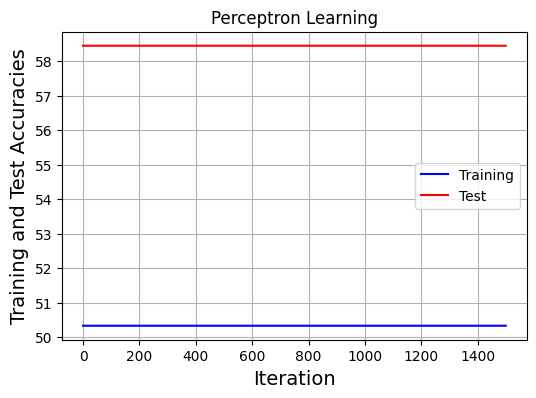

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.plot(range(MaxIter), P_train, 'b', label = "Training")
ax.plot(range(MaxIter), P_test, 'r', label = "Test")
ax.grid(True)
ax.legend()
ax.set_title('Perceptron Learning')
ax.set_ylabel('Training and Test Accuracies', fontsize=14)
ax.set_xlabel('Iteration', fontsize=14)
plt.savefig('learningCurves.png')